# Análise das Ocorrências Aeronáuticas na Aviação Civil Brasileira

**Data: 09-06-2022**

**Autor: Jaildo Rocha**

---

## Introdução

No presente notebook busca-se obter, a partir da análise e exploração de dados, uma compreensão sobre causas das [ocorrências aeronáuticas na aviação civil](https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira) entre os anos de 2012 e 2021 e obter insights de possíveis melhorias na segurança da aviação civil. Para isso, este estudo foi dividido em etapas:

* Pré processamento (importar pacotes, ler dados e uma breve verificação);
* Limpeza dos dados;
* Análise exploratórias dos dados;
* Conclusões; e
* Recomendações para o prosseguimento do trabalho. 

Cabe realizar duas observações importantes para este estudo. O primeiro é que este estudo tem foco, principalmente, em aviões e helicópteros. Tal premissa decorre do entendimento que outros tipos de aeronaves (Trike, balão, ultraleve, planador, jidroavião e anfíbio) tem aspectos regulatórios que diferem bastante dos aviões e helicópteros. O segundo é que, pontualmente, serão utilizadas outras bases de dados, estudos ou informações para contextualizar este estudo.

## Pré processamento

Primeiramente, realiza-se a importação das bibliotecas e uma configuração básica para as figuras.

In [1]:
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# set plot parameters
custom_params = {'axes.spines.right': False, 
                 'axes.spines.top': False,
                 'figure.figsize':(16,6)}
sns.set_theme(style='ticks', rc = custom_params)

Em seguida os dados das ocorrências são importados.

In [2]:
# tipos de valores não disponíveis
list_na_values = ['*', '**', '***', '****', '*****',
            'NULL', 'NÃO INFORMADO', '###', '###!', '####',]

# read ocorrencia
ocorrencia_df = pd.read_csv('../raw_data/ocorrencia.csv',
                            sep = ';', encoding='utf8', 
                            na_values = list_na_values)

# read tipo ocorrencia
tipo_occ_df = pd.read_csv('../raw_data/ocorrencia_tipo.csv',
                          sep = ';', encoding = 'utf8', 
                          na_values = list_na_values)

# read aeronave
aeronave_df = pd.read_csv('../raw_data/aeronave.csv',
                          sep = ';', encoding = 'utf8', 
                          na_values = list_na_values)

# read fator contribuinte
fator_cont_df = pd.read_csv('../raw_data/fator_contribuinte.csv',
                            sep = ';', encoding = 'utf8', 
                            na_values = list_na_values)

# read recomendacao
recomendacao_df = pd.read_csv('../raw_data/recomendacao.csv',
                              sep = ';', encoding = 'utf8', 
                              na_values = list_na_values)

Em seguida se faz uma breve verificação dos dados importados.

### Ocorrências

In [3]:
ocorrencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             3673 non-null   object
 7   ocorrencia_longitude            3672 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5165 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            3262 non-null   object
 12  ocorrencia_dia                  5167 non-null   

In [4]:
ocorrencia_df.nunique()

codigo_ocorrencia                 5167
codigo_ocorrencia1                5167
codigo_ocorrencia2                5167
codigo_ocorrencia3                5167
codigo_ocorrencia4                5167
ocorrencia_classificacao             3
ocorrencia_latitude               2586
ocorrencia_longitude              2589
ocorrencia_cidade                 1053
ocorrencia_uf                       27
ocorrencia_pais                      1
ocorrencia_aerodromo               512
ocorrencia_dia                    2684
ocorrencia_hora                    923
investigacao_aeronave_liberada       2
investigacao_status                  2
divulgacao_relatorio_numero       1718
divulgacao_relatorio_publicado       2
divulgacao_dia_publicacao          179
total_recomendacoes                 13
total_aeronaves_envolvidas           3
ocorrencia_saida_pista               2
dtype: int64

Como pode ser observado, há apenas uma ocorrência para cada linha. Aparentemente, os dados apresentam uma boa qualidade.

### Tipo de ocorrência

In [5]:
tipo_occ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5347 entries, 0 to 5346
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         5347 non-null   int64 
 1   ocorrencia_tipo            5346 non-null   object
 2   ocorrencia_tipo_categoria  5346 non-null   object
 3   taxonomia_tipo_icao        5346 non-null   object
dtypes: int64(1), object(3)
memory usage: 167.2+ KB


In [6]:
tipo_occ_df.nunique()

codigo_ocorrencia1           5167
ocorrencia_tipo                80
ocorrencia_tipo_categoria      80
taxonomia_tipo_icao            32
dtype: int64

No caso do tipo de ocorrência, um evento pode apresentar mais de um tipo ocorrência. Além disso, os dados aparentemente estão bem classificados. Por fim, vale observar que os dados estão bem completos.

### Aeronave

In [7]:
aeronave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5235 non-null   int64  
 1   aeronave_matricula           5221 non-null   object 
 2   aeronave_operador_categoria  2287 non-null   object 
 3   aeronave_tipo_veiculo        5080 non-null   object 
 4   aeronave_fabricante          4887 non-null   object 
 5   aeronave_modelo              5065 non-null   object 
 6   aeronave_tipo_icao           4970 non-null   object 
 7   aeronave_motor_tipo          5003 non-null   object 
 8   aeronave_motor_quantidade    5143 non-null   object 
 9   aeronave_pmd                 5235 non-null   int64  
 10  aeronave_pmd_categoria       5235 non-null   int64  
 11  aeronave_assentos            5041 non-null   float64
 12  aeronave_ano_fabricacao      5035 non-null   float64
 13  aeronave_pais_fabr

In [8]:
aeronave_df.nunique()

codigo_ocorrencia2             5167
aeronave_matricula             3901
aeronave_operador_categoria      10
aeronave_tipo_veiculo             9
aeronave_fabricante             233
aeronave_modelo                 737
aeronave_tipo_icao              229
aeronave_motor_tipo               5
aeronave_motor_quantidade         5
aeronave_pmd                    459
aeronave_pmd_categoria          459
aeronave_assentos                86
aeronave_ano_fabricacao          80
aeronave_pais_fabricante         23
aeronave_pais_registro           23
aeronave_registro_categoria       9
aeronave_registro_segmento       12
aeronave_voo_origem             677
aeronave_voo_destino            674
aeronave_fase_operacao           31
aeronave_tipo_operacao            9
aeronave_nivel_dano               4
aeronave_fatalidades_total       10
dtype: int64

No caso do dataframe das aeronaves, são observados uma maior quantidade de problemas, uma vez que, algumas aeronaves não apresentam matricula, alguns veículos não são tipificados, a classificação quanto ao peso máximo de decolagem (PMD) parece não existir.

### Fator de contribuição para ocorrência

In [9]:
fator_cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   3464 non-null   int64 
 1   fator_nome           3464 non-null   object
 2   fator_aspecto        3445 non-null   object
 3   fator_condicionante  3110 non-null   object
 4   fator_area           3445 non-null   object
dtypes: int64(1), object(4)
memory usage: 135.4+ KB


In [10]:
fator_cont_df.nunique()

codigo_ocorrencia3     944
fator_nome              74
fator_aspecto           11
fator_condicionante      6
fator_area               4
dtype: int64

Já o fator de contribuição apresenta aparentemente poucos valores nulos. Com classificação razoável principalmente no que diz respeito ao aspecto, condicionante e área. Entrentanto deve-se notar que apenas 944 ocorrencias apresentam fator de contribuição.

### Recomendações

In [11]:
recomendacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               1197 non-null   int64 
 1   recomendacao_numero              1197 non-null   object
 2   recomendacao_dia_assinatura      1197 non-null   object
 3   recomendacao_dia_encaminhamento  1197 non-null   object
 4   recomendacao_dia_feedback        765 non-null    object
 5   recomendacao_conteudo            1195 non-null   object
 6   recomendacao_status              1190 non-null   object
 7   recomendacao_destinatario_sigla  1197 non-null   object
 8   recomendacao_destinatario        1197 non-null   object
dtypes: int64(1), object(8)
memory usage: 84.3+ KB


In [12]:
recomendacao_df.nunique()

codigo_ocorrencia4                  591
recomendacao_numero                1193
recomendacao_dia_assinatura         155
recomendacao_dia_encaminhamento     168
recomendacao_dia_feedback           288
recomendacao_conteudo              1171
recomendacao_status                   4
recomendacao_destinatario_sigla      18
recomendacao_destinatario            18
dtype: int64

Por fim, no caso das recomendações apresentam ainda menos dados de ocorrência. Porém, o mesmo aparenta ser um dataframe mais completo.

## Limpeza dos dados

Antes de começar a limpeza em si, é importante verificar o modelo de dados disponibilizado pelo CENIPA como pode ser observado na figura a seguir.
<img src="../img/modelo_dados.png">


### Ocorrências

Para simplificar e deixar mais clara a visualização das ocorrências algumas colunas foram removidas.

In [13]:
# Remover colunas que não serão utilizadas
## codigo ocorrencia 1,2,3,4 possuem a mesma info
## ocorrencia país (apenas eventos no Brasil)
## ocorrencias de divulgacao de relatorio
## apesar da importância latitude e longitude não serão incluídas inicialmente
## devido a qualidade

ocorrencia_df = ocorrencia_df[['codigo_ocorrencia', 'ocorrencia_classificacao',
                               'ocorrencia_cidade','ocorrencia_uf',
                               'ocorrencia_aerodromo','ocorrencia_dia', 
                               'ocorrencia_hora', 'investigacao_status', 
                               'total_recomendacoes', 
                               'total_aeronaves_envolvidas',
                               'ocorrencia_saida_pista']]
ocorrencia_df.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,05/01/2012,20:27:00,FINALIZADA,0,1,NÃO
1,45331,ACIDENTE,GUARULHOS,SP,SBGR,06/01/2012,13:44:00,FINALIZADA,3,1,NÃO
2,45333,ACIDENTE,VIAMÃO,RS,NaN,06/01/2012,13:00:00,FINALIZADA,0,1,NÃO
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,NaN,06/01/2012,17:00:00,NaN,0,1,NÃO
4,45407,ACIDENTE,SÃO SEPÉ,RS,NaN,06/01/2012,16:30:00,FINALIZADA,0,1,NÃO


Em seguida foi realizado a alteração nos "data type" das colunas de tempo e cria a coluna dia da semana e ano da ocorrencia.

In [14]:
ocorrencia_df['ocorrencia_dia'] = (
    pd.to_datetime(ocorrencia_df['ocorrencia_dia'], format="%d/%m/%Y" ))

ocorrencia_df['ocorrencia_hora'] = ( 
    pd.to_datetime(ocorrencia_df['ocorrencia_hora'])) 

ocorrencia_df['ocorrencia_dia_nome'] = (
    ocorrencia_df['ocorrencia_dia']
    .dt
    .day_name())

ocorrencia_df['ocorrencia_ano'] = (
    ocorrencia_df['ocorrencia_dia']
    .dt
    .year)

### Tipo de ocorrência

A tabela tipo de ocorrencia quase não tem valores nulos, excetuando o código da ocorrencia, todas colunas tem apenas um valor não disponível.

In [15]:
# check nulls
tipo_occ_df[tipo_occ_df.isna().any(axis=1)]

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
3730,78527,NaN,NaN,NaN


In [16]:
# drop nulls/na
tipo_occ_df.dropna(inplace = True)
tipo_occ_df.shape

(5346, 4)

### Aeronaves

Para as aeronaves foram removidas as colunas que não serão utilizadas por diversos motivos e será adicionada a coluna ocorrencia_fatalidade.

In [17]:
# Remover colunas que não serão utilizadas
## operador de categoria muitos NA's
## tipo de veiculo == registro de categoria
## origem e destino poderiam ser usadas porém precisariam de um tratamento maior
## por exemplo com obtencao da distancia dos voos.

aeronave_df.drop(columns =['aeronave_operador_categoria', 
                           'aeronave_tipo_veiculo','aeronave_pmd_categoria', 
                           'aeronave_assentos','aeronave_pais_fabricante',
                           'aeronave_voo_origem','aeronave_voo_destino'], 
                 inplace = True)

# add fatalidade
aeronave_df['ocorrencia_fatalidade'] = (
    np.where(aeronave_df['aeronave_fatalidades_total'] > 0,
             True, False))


# set 0 to na --> ano de fabrição
aeronave_df.loc[aeronave_df.aeronave_ano_fabricacao == 0,
                ['aeronave_ano_fabricacao']] = np.nan

aeronave_df.loc[aeronave_df.aeronave_ano_fabricacao == 9999,
                ['aeronave_ano_fabricacao']] = np.nan

# se o registro do segmento é regular --> categoria = aviao
# provavel - acredito que helicoptero seja apenas taxi aereo
aeronave_df['aeronave_registro_categoria'] = (
    np.where(aeronave_df['aeronave_registro_segmento']== 'REGULAR',
             'AVIÃO', aeronave_df['aeronave_registro_categoria']))



aviao_helicoptero_df = (
    aeronave_df
    .query('aeronave_registro_categoria == "AVIÃO" | aeronave_registro_categoria == "HELICÓPTERO"')
    .copy())


### Fator de contribuição

Para o fator de contribuição buscou-se observar os valores nulos do fator aspecto ou do fator area.

In [18]:
filter_fator = (fator_cont_df.fator_area.isna() | 
                fator_cont_df.fator_aspecto.isna())
fator_cont_df[filter_fator]

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
29,45397,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
78,45526,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
130,45585,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
344,46260,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
496,46748,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
615,47142,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
899,50095,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
1125,50996,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
1404,52291,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN
1556,52946,INFLUÊNCIA DO MEIO AMBIENTE,NaN,NaN,NaN


Considerando que a influência do meio ambiente se relaciona é similar condições meteorológicas adversas foi prenchido com a mesma entrada de condições meteorológicas adversas.

In [19]:
fator_cont_df['fator_aspecto'] = (
    np.where(fator_cont_df['fator_nome'] == 'INFLUÊNCIA DO MEIO AMBIENTE',
             'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL', 
             fator_cont_df['fator_aspecto']))


fator_cont_df['fator_area'] = (
    np.where(fator_cont_df['fator_nome'] == 'INFLUÊNCIA DO MEIO AMBIENTE',
             'FATOR OPERACIONAL', fator_cont_df['fator_area']))

Em seguida, nota-se que vários fatores podem contribuir para acidentes e incidentes, tanto no que se refere a área quanto ao aspecto. Neste sentido foi decidido, criar um data_frame adicional para fator área separadamente.

In [20]:
fator_area_df = (
    fator_cont_df[['codigo_ocorrencia3', 'fator_area']]
    .drop_duplicates()
    .copy())

### Recomendações

As recomendações, por sua vez, serão mantidas do jeito que estão.

## Análise exploratória dos dados

Antes de ser iniciada a análise exploratória, é importante descrever uma variável importante a classificação do acidente:

- Acidente
  - Lesão grave ou morte
  - Danos ou falhas estruturais
  - Aeronave desaparecida
- Incidente
  - Danos reparáveis
  - Pequenas lesões
- Incidente graves
  - Fogo
  - Perda de uma ou mais funções do motores
  - Perda de energia

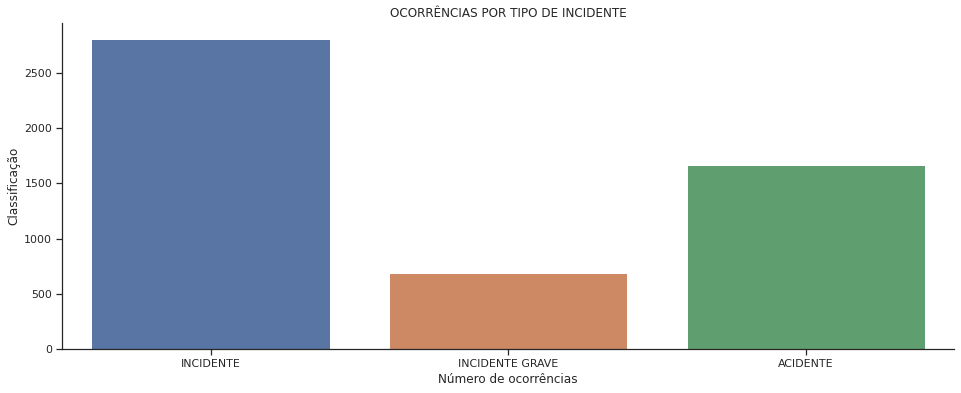

In [21]:
plot1 = sns.countplot(x="ocorrencia_classificacao",
                      order=['INCIDENTE','INCIDENTE GRAVE', 'ACIDENTE'],
                      data = ocorrencia_df)

plot1.set(title = "OCORRÊNCIAS POR TIPO DE INCIDENTE",
          xlabel='Número de ocorrências', 
          ylabel='Classificação')
plt.show()

### Mortes em acidentes aéreos

É dito rotineiramente o quanto voar é seguro. Veremos a seguir os dados referente a essa afirmação


In [22]:
print("Total de mortes em ocorrências da aviação civil (2012-2021): ",
      aeronave_df.aeronave_fatalidades_total.sum())

print("Mortes em helicóptero e aviões na aviação civil (2012-2021): ",
      aviao_helicoptero_df.aeronave_fatalidades_total.sum())

Total de mortes em ocorrências da aviação civil (2012-2021):  768
Mortes em helicóptero e aviões na aviação civil (2012-2021):  621


Quando comparado com o modal de transporte rodoviário o número de [mortes em rodovias federais](https://www.cnt.org.br/painel-acidente) na mesma época supera 70.000. Em seguida, são evidenciados os a mortes por categoria de aeronave.

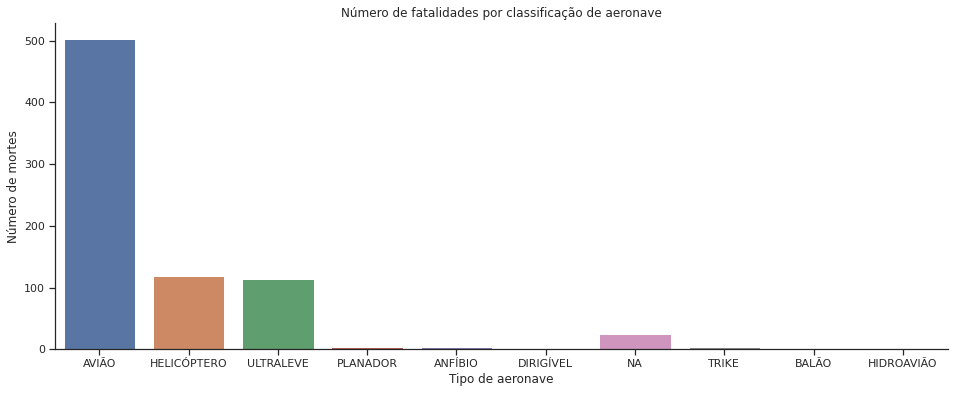

In [23]:
# criar df para inserir NA no sns
plot_aero_df = aeronave_df.copy()
plot_aero_df['aeronave_registro_categoria'] = (
    plot_aero_df['aeronave_registro_categoria'].fillna('NA'))

plot_aero_df['aeronave_registro_segmento'] = (
    plot_aero_df['aeronave_registro_segmento'].fillna('NA'))

plot2 = sns.barplot(x="aeronave_registro_categoria",
                      y="aeronave_fatalidades_total",
                      # order=['INCIDENTE','INCIDENTE GRAVE', 'ACIDENTE'],
                      estimator=sum,
                      ci = None,
                      data = plot_aero_df )

plot2.set(title = "Número de fatalidades por classificação de aeronave",
          ylabel="Número de mortes", xlabel="Tipo de aeronave")
plt.show()

Como pode ser observado, os aviões e helicopteros representam a maioria de fatalidade na aviação civil na época analisada. Deve-se ressaltar também o número de mortes com aeronaves do tipo ultraleve que superam 100. Porém é importante verificar também a quantidade de acidentes uma vez que os aviões e helicoptéros possuem, geralmente um maior número de vítimas por ocorrência.

In [24]:
(aeronave_df
 .query('aeronave_fatalidades_total > 0')
 .groupby(['aeronave_registro_categoria'])
 .size()
 .reset_index(name='acidentes fatais'))

,aeronave_registro_categoria,acidentes fatais
0,ANFÍBIO,2
1,AVIÃO,240
2,HELICÓPTERO,45
3,PLANADOR,3
4,TRIKE,3
5,ULTRALEVE,80


Na próxima figura é evidenciado as mortes por segmento de uso de aeronave.

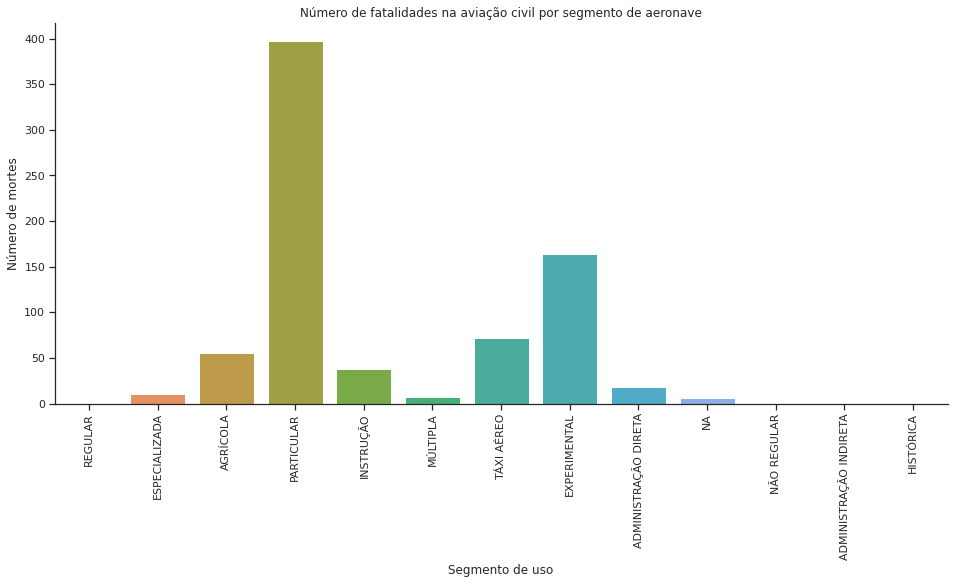

In [25]:
plt.figure(figsize=(16, 7))
plot3 = sns.barplot(x = "aeronave_registro_segmento",
                    y="aeronave_fatalidades_total",
                    estimator=sum,
                    ci = None,
                    data = plot_aero_df )

plot3.set(title =  "Número de fatalidades na aviação civil por segmento de aeronave",
          ylabel = "Número de mortes", 
          xlabel = "Segmento de uso")
plt.xticks(rotation = 90)
plt.show()

Vale notar a partir da figura, valores altos para aviaçaõ particular, táxi aéreo e experimental (não pode exercer atividade comercial ou voar sobre áreas densamente povoadas) e a ausência de mortes para voos regulares. Em seguida são evidenciados os eventos com acidentes fatais por segmento.

In [26]:
(aeronave_df
 .query('aeronave_fatalidades_total > 0')
 .groupby(['aeronave_registro_segmento'])
 .size()
 .reset_index(name='acidentes fatais'))

,aeronave_registro_segmento,acidentes fatais
0,ADMINISTRAÇÃO DIRETA,5
1,AGRÍCOLA,47
2,ESPECIALIZADA,8
3,EXPERIMENTAL,108
4,INSTRUÇÃO,21
5,MÚLTIPLA,3
6,PARTICULAR,168
7,TÁXI AÉREO,25


Como pode ser observado a aviação experimental é um fator de risco na aviação brasileira levando em conta o elevado grau de ocorrências com fatalidade.

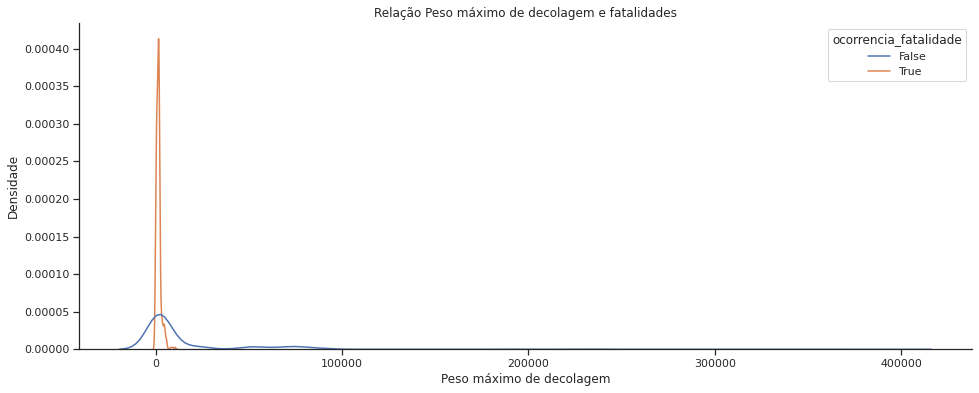

In [39]:
plot4= sns.kdeplot(x="aeronave_pmd", 
                   hue = "ocorrencia_fatalidade",
                   common_norm = False,
                   data = aeronave_df)

plot4.set(title = "Relação Peso máximo de decolagem e fatalidades",
          xlabel='Peso máximo de decolagem', 
          ylabel='Densidade')
plt.show()

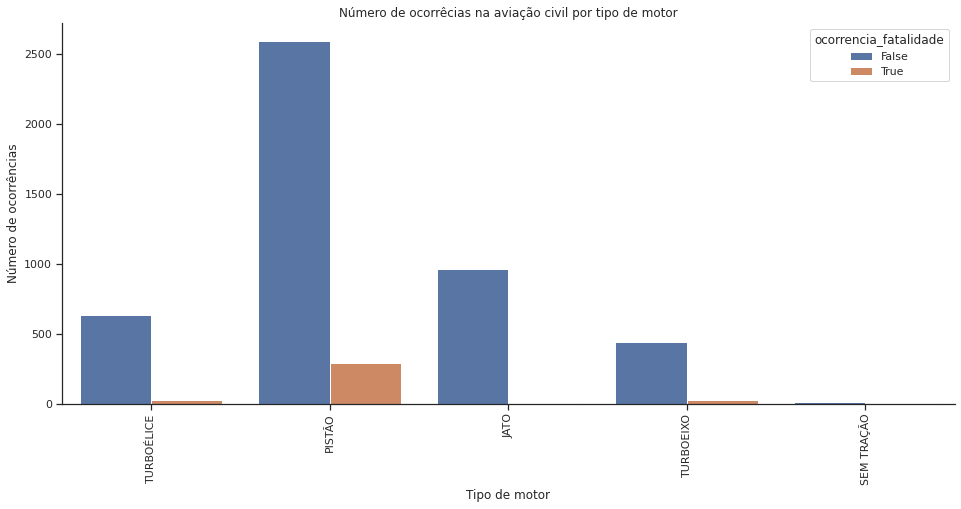

In [28]:
plt.figure(figsize=(16, 7))
plot5 = sns.countplot(x = "aeronave_motor_tipo",
                      hue = "ocorrencia_fatalidade",
                      data = aeronave_df )

plot5.set(title =  "Número de ocorrêcias na aviação civil por tipo de motor",
          ylabel = "Número de ocorrências", 
          xlabel = "Tipo de motor")
plt.xticks(rotation = 90)
plt.show()

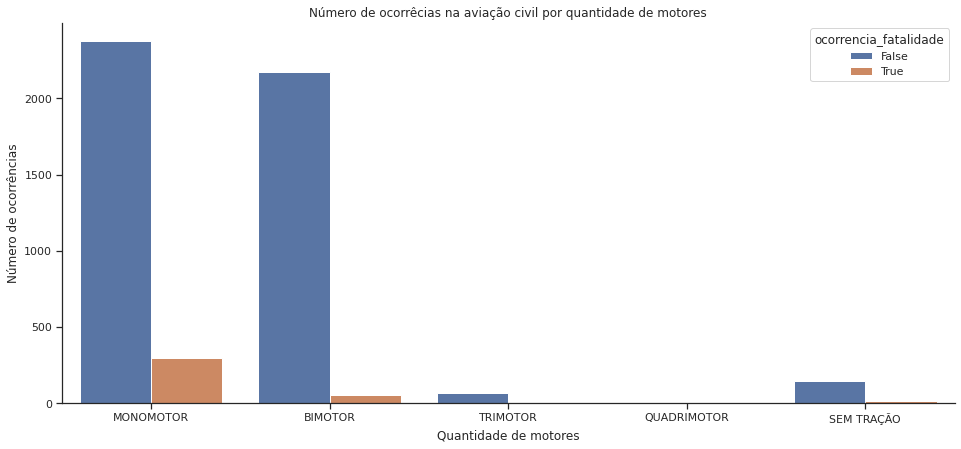

In [29]:
plt.figure(figsize=(16, 7))
plot6 = sns.countplot(x = "aeronave_motor_quantidade",
                      order=['MONOMOTOR','BIMOTOR', 'TRIMOTOR',
                             'QUADRIMOTOR','SEM TRAÇÃO'],
                      hue = "ocorrencia_fatalidade",
                      data = aeronave_df )

plot6.set(title =  "Número de ocorrêcias na aviação civil por quantidade de motores",
          ylabel = "Número de ocorrências", 
          xlabel = "Quantidade de motores")
plt.show()

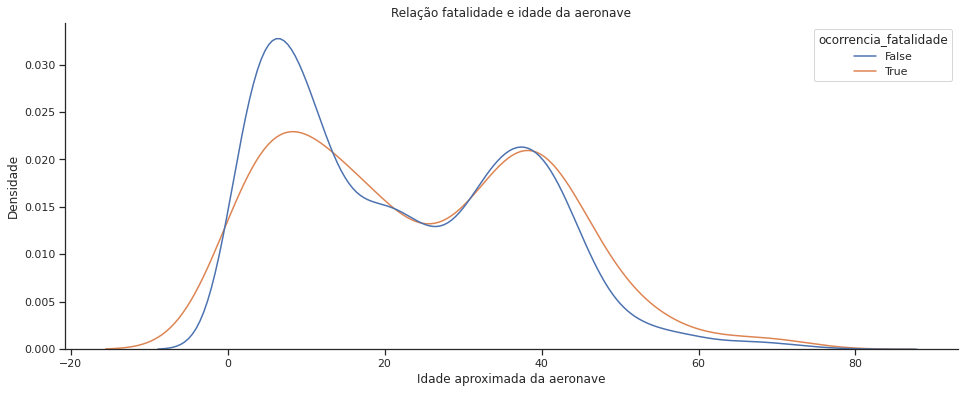

In [35]:
aeronave_ocorrencia_df = (pd
                          .merge(left=aeronave_df, right = ocorrencia_df,
                                 how='left',left_on='codigo_ocorrencia2', 
                                 right_on = 'codigo_ocorrencia'))
aeronave_ocorrencia_df['aeronave_idade'] = (
    aeronave_ocorrencia_df['ocorrencia_ano'] -
    aeronave_ocorrencia_df['aeronave_ano_fabricacao'])

plot7= sns.kdeplot(x="aeronave_idade", 
                   common_norm = False,
                   hue = "ocorrencia_fatalidade",
                    data = aeronave_ocorrencia_df)

plot7.set(title = "Relação fatalidade e idade da aeronave",
          xlabel='Idade aproximada da aeronave', 
          ylabel='Densidade')
plt.show()



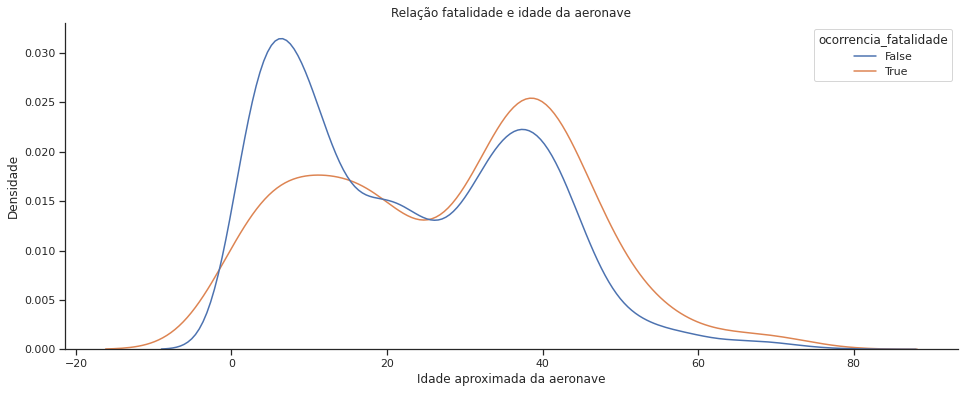

In [36]:
aviao_heli_ocorrencia_df = (pd
                          .merge(left=aviao_helicoptero_df, right = ocorrencia_df,
                                 how='left',left_on='codigo_ocorrencia2', 
                                 right_on = 'codigo_ocorrencia'))
aviao_heli_ocorrencia_df['aeronave_idade'] = (
    aviao_heli_ocorrencia_df['ocorrencia_ano'] -
    aviao_heli_ocorrencia_df['aeronave_ano_fabricacao'])

plot8= sns.kdeplot(x="aeronave_idade", 
                   common_norm = False,
                   hue = "ocorrencia_fatalidade",
                   data = aviao_heli_ocorrencia_df)

plot8.set(title = "Relação fatalidade e idade da aeronave",
          xlabel='Idade aproximada da aeronave', 
          ylabel='Densidade')
plt.show()


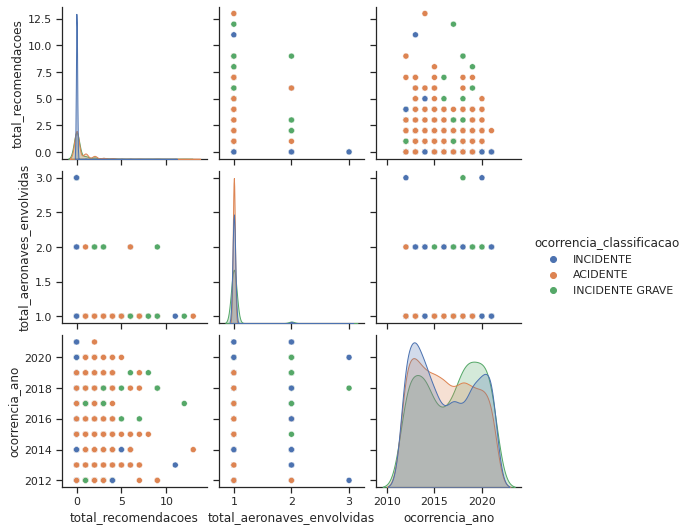

In [72]:
sns.pairplot(ocorrencia_df.drop(columns =['codigo_ocorrencia']),
             hue ='ocorrencia_classificacao',
             diag_kind='kde',
             diag_kws=dict(common_norm = False));

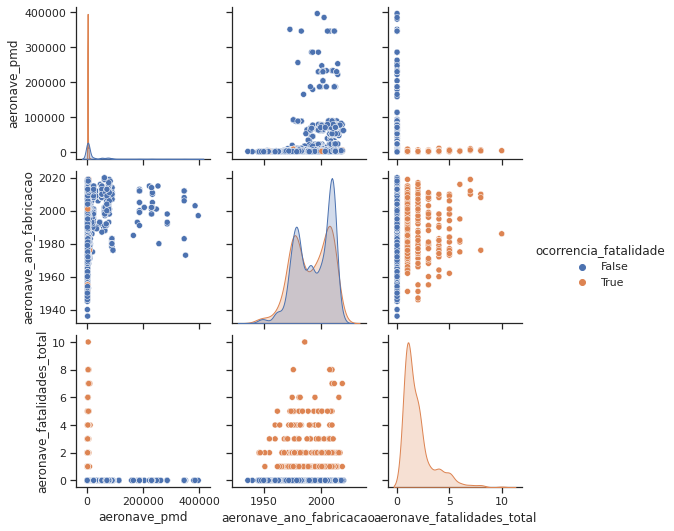

In [73]:
sns.pairplot(aeronave_df.drop(columns =['codigo_ocorrencia2']),
             hue ='ocorrencia_fatalidade',
             diag_kws=dict(common_norm = False));